In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dersk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
data = pd.read_csv('./data/email.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
data['Category'].value_counts()

ham               4825
spam               747
{"mode":"full"       1
Name: Category, dtype: int64

In [6]:
data = data[data['Category'].isin(['ham', 'spam'])]
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
duplicate_rows = data.duplicated()
num_duplicates = duplicate_rows.sum()
print(num_duplicates)

415


In [8]:
data=data.drop_duplicates()
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:

def preprocessed_text(text):
    # Lowercase
    text = text.lower()
    
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 
    processed_text = ' '.join(tokens)
    
    return processed_text

# Data Preprocessing 

In [10]:
data=data.dropna()

data['Message'] = data['Message'].apply(preprocessed_text)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

In [11]:
print(data)

      Category                                            Message
0            0  go jurong point crazi avail bugi n great world...
1            0                              ok lar joke wif u oni
2            1  free entri 2 wkli comp win fa cup final tkt 21...
3            0                u dun say earli hor u c alreadi say
4            0          nah dont think goe usf live around though
...        ...                                                ...
5567         1  2nd time tri 2 contact u u £750 pound prize 2 ...
5568         0                            ü b go esplanad fr home
5569         0                            piti mood soani suggest
5570         0  guy bitch act like id interest buy someth els ...
5571         0                                     rofl true name

[5157 rows x 2 columns]


# Vectorization

In [12]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message'])
y = data['Category']

print("Unique labels in y_train:", y.unique())
print("Data type of y_train:", y.dtype)

Unique labels in y_train: [0 1]
Data type of y_train: int64


# Cross Validation

In [13]:
# Cross validation:
def cross_validate(X, y, num_iter=10):
    results = {'precision': [], 'recall': [], 'f1': []}
    for i in range(num_iter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        y_pred = MultinomialNB_model(X_train, y_train, X_test)
        p, r, f,_= precision_recall_fscore_support(y_test, y_pred, pos_label=1, average='binary')
        results['precision'].append(p)
        results['recall'].append(r)
        results['f1'].append(f)
    return results
            

# Model

In [14]:
def MultinomialNB_model(X_train, y_train, X_test):
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    return y_pred

# Data split

# Training

# Model Evaluation

In [15]:
results = cross_validate(X, y)
print('precision scores:', results["precision"])
print('recall scores:', results["recall"])
print('f1 scores:', results["f1"])
print()
print('precision average score:', sum(results["precision"]) / len(results["precision"]))
print('recall average score:', sum(results["recall"]) / len(results["recall"]))
print('f1 average score:', sum(results["f1"]) / len(results["f1"]))

precision scores: [0.889763779527559, 0.87248322147651, 0.9241379310344827, 0.8881578947368421, 0.825503355704698, 0.9262295081967213, 0.8702290076335878, 0.8367346938775511, 0.873015873015873, 0.8601398601398601]
recall scores: [0.9112903225806451, 0.9154929577464789, 0.9054054054054054, 0.9246575342465754, 0.9389312977099237, 0.9262295081967213, 0.9421487603305785, 0.9318181818181818, 0.8943089430894309, 0.9389312977099237]
f1 scores: [0.900398406374502, 0.8934707903780069, 0.9146757679180887, 0.9060402684563759, 0.8785714285714286, 0.9262295081967213, 0.9047619047619048, 0.8817204301075269, 0.8835341365461847, 0.8978102189781022]

precision average score: 0.8766395125343684
recall average score: 0.9229214208833865
f1 average score: 0.8987212860288842


# Graph Of Model Performance

904 11 8 109


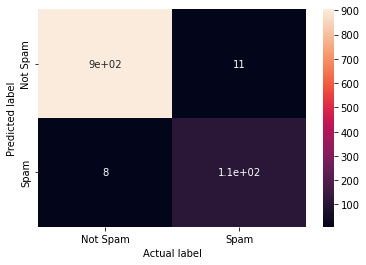

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = MultinomialNB_model(X_train, y_train, X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');